In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Ionosphere\Ionosphere_AN_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1,0,NaN,0.00419,NaN,-0.02723,NaN,NaN,NaN,NaN,...,0.94520,NaN,0.93522,0.04925,NaN,0.08168,NaN,-0.00035,NaN,NaN
348,1,0,NaN,-0.00034,NaN,-0.03227,NaN,NaN,NaN,NaN,...,0.93988,NaN,0.92489,0.02542,NaN,0.02242,NaN,0.00442,NaN,NaN
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
int64		column 2	0
float64		column 3	68
float64		column 4	0
float64		column 5	138
float64		column 6	0
float64		column 7	138
float64		column 8	68
float64		column 9	138
float64		column 10	68
float64		column 11	104
float64		column 12	36
float64		column 13	102
float64		column 14	34
float64		column 15	138
float64		column 16	0
float64		column 17	138
float64		column 18	0
float64		column 19	138
float64		column 20	104
float64		column 21	70
float64		column 22	34
float64		column 23	138
float64		column 24	0
float64		column 25	104
float64		column 26	68
float64		column 27	36
float64		column 28	0
float64		column 29	138
float64		column 30	0
float64		column 31	138
float64		column 32	36
float64		column 33	138
float64		column 34	34


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,351.000000,351.0,283.000000,351.000000,213.000000,351.000000,213.000000,283.000000,213.000000,283.000000,...,247.000000,283.000000,315.000000,351.000000,213.000000,351.000000,213.000000,315.000000,213.000000,317.000000
mean,0.891738,0.0,0.657919,0.044372,0.613762,0.115889,0.559474,0.104368,0.532881,0.172009,...,0.440859,-0.083666,0.554180,-0.069538,0.417537,-0.027907,0.425722,0.005248,0.428142,0.021542
std,0.311155,0.0,0.489186,0.441435,0.485769,0.460810,0.473545,0.523873,0.473612,0.480682,...,0.540680,0.502106,0.501433,0.550025,0.536999,0.507974,0.515635,0.510988,0.478868,0.476601
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.499350,-0.064735,0.431170,-0.024795,0.231820,-0.065840,0.114700,-0.051075,...,0.030730,-0.316040,0.316680,-0.443165,0.019970,-0.236885,0.000960,-0.227420,0.000000,-0.168270
50%,1.000000,0.0,0.881100,0.016310,0.799170,0.022800,0.716280,0.013730,0.680650,0.012660,...,0.561210,-0.023670,0.708820,-0.017690,0.526130,0.000000,0.538610,0.000000,0.520990,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.963650,0.365770,0.930510,0.502565,...,0.901050,0.133330,0.999210,0.153535,0.877010,0.154075,0.864150,0.200080,0.842580,0.173910
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

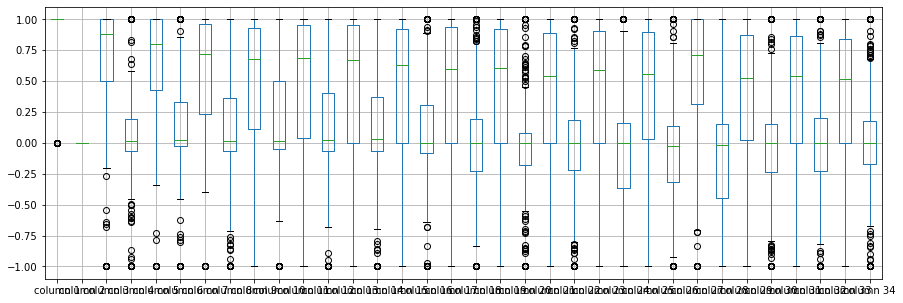

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     0.891738
column 2     0.000000
column 3     0.657919
column 4     0.044372
column 5     0.613762
column 6     0.115889
column 7     0.559474
column 8     0.104368
column 9     0.532881
column 10    0.172009
column 11    0.478539
column 12    0.140055
column 13    0.420696
column 14    0.093887
column 15    0.390446
column 16    0.071132
column 17    0.417095
column 18   -0.003617
column 19    0.420072
column 20   -0.030903
column 21    0.365965
column 22    0.019350
column 23    0.403337
column 24   -0.057406
column 25    0.440859
column 26   -0.083666
column 27    0.554180
column 28   -0.069538
column 29    0.417537
column 30   -0.027907
column 31    0.425722
column 32    0.005248
column 33    0.428142
column 34    0.021542
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,NaN,0.333534,-0.006529,0.108778,0.127606,0.176803,0.005093,0.056467,-0.015744,...,0.018410,0.189758,-0.215487,-0.010725,0.070625,-0.121415,0.141250,-0.130424,0.187417,0.016204
column 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
column 3,0.333534,NaN,1.000000,0.129279,0.489325,0.065996,0.487167,-0.016750,0.480901,0.126872,...,0.252921,-0.037634,0.104202,0.069084,0.430160,0.057436,0.226727,-0.053102,0.315521,0.044649
column 4,-0.006529,NaN,0.129279,1.000000,0.034954,-0.190308,-0.044029,0.214518,-0.235180,0.192972,...,-0.059820,-0.277586,-0.050143,0.000743,-0.029785,0.342301,-0.071094,-0.143472,-0.144101,0.042803
column 5,0.108778,NaN,0.489325,0.034954,1.000000,-0.079921,0.652280,-0.073647,0.460861,-0.050605,...,0.281280,-0.023383,0.105741,0.121715,0.340089,0.064660,0.451856,-0.060678,0.401496,-0.061150
column 6,0.127606,NaN,0.065996,-0.190308,-0.079921,1.000000,-0.051675,0.274433,-0.154858,0.184630,...,-0.185569,0.058572,-0.174005,-0.068775,-0.049729,-0.158090,-0.150999,0.333555,-0.006179,0.194275
column 7,0.176803,NaN,0.487167,-0.044029,0.652280,-0.051675,1.000000,-0.273745,0.571932,-0.262135,...,0.401199,0.067585,0.175740,0.109148,0.324853,0.007073,0.410213,-0.018477,0.604274,-0.027603
column 8,0.005093,NaN,-0.016750,0.214518,-0.073647,0.274433,-0.273745,1.000000,-0.328908,0.410496,...,-0.259380,-0.144558,-0.229934,0.022469,-0.151383,0.074016,-0.237188,0.142496,-0.260809,0.393614
column 9,0.056467,NaN,0.480901,-0.235180,0.460861,-0.154858,0.571932,-0.328908,1.000000,-0.218970,...,0.451515,0.152182,0.210229,0.050319,0.437453,-0.056993,0.325922,-0.121493,0.430833,-0.117762
column 10,-0.015744,NaN,0.126872,0.192972,-0.050605,0.184630,-0.262135,0.410496,-0.218970,1.000000,...,-0.168190,-0.064568,-0.246494,0.153003,-0.116603,-0.021637,-0.133217,0.002211,-0.322157,0.139652


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+18,34+18+18,34+18+18+18,34+18+18+18+18,34+18+18+18,34+18+18,34+18,34], vae_layer = False, seed = 180)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 15.902180490039644
Epoch: 1 , loss: 15.719448362077985
Epoch: 2 , loss: 15.788996242341542
Epoch: 3 , loss: 15.747875349862236
Epoch: 4 , loss: 15.70460964384533
Epoch: 5 , loss: 15.799545469738188
Epoch: 6 , loss: 15.657009351821173
Epoch: 7 , loss: 15.659379277910505
Epoch: 8 , loss: 15.71767757052467
Epoch: 9 , loss: 15.515851111639114
Epoch: 10 , loss: 15.51593421754383
Epoch: 11 , loss: 15.53225648970831
Epoch: 12 , loss: 15.398208209446498
Epoch: 13 , loss: 15.268649918692452
Epoch: 14 , loss: 15.0636050814674
Epoch: 15 , loss: 15.036554881504603
Epoch: 16 , loss: 14.714718092055548
Epoch: 17 , loss: 14.116851942879814
Epoch: 18 , loss: 13.62527120681036
Epoch: 19 , loss: 13.513364610217867
Epoch: 20 , loss: 13.52764656430199
Epoch: 21 , loss: 13.401295752752395
Epoch: 22 , loss: 13.45583506992885
Epoch: 23 , loss: 13.30171031043643
Epoch: 24 , loss: 13.086722328549339
Epoch: 25 , loss: 13.227714

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(351, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.000000
column 2     0.000000
column 3    -0.037470
column 4     1.000000
column 5    -0.036150
column 6     0.000000
column 7    -0.038331
column 8     0.000000
column 9    -0.035636
column 10   -1.000000
column 11   -0.037728
column 12    0.000000
column 13   -0.042344
column 14    0.005658
column 15   -0.042804
column 16   -1.000000
column 17   -0.039590
column 18   -1.000000
column 19   -0.038410
column 20   -0.000851
column 21   -1.000000
column 22    1.000000
column 23   -0.037884
column 24    0.000000
column 25   -0.036549
column 26   -0.004567
column 27    1.000000
column 28   -1.000000
column 29   -0.030685
column 30    1.000000
column 31   -0.028876
column 32    1.000000
column 33   -0.030271
column 34    1.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Ionosphere.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0,0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
1,0,0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
2,0,0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
3,0,0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
4,0,0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0,0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
347,0,0,-0.523117,0.0,-0.550791,0.0,-0.530320,0.026691,-0.566744,0.034951,...,0.0,-0.043916,0.0,0.0,-0.620397,0.0,-0.630222,0.0,-0.598112,-0.033552
348,0,0,-0.712479,0.0,-0.711752,0.0,-0.730739,0.042167,-0.749251,0.009029,...,0.0,-0.049948,0.0,0.0,-0.752453,0.0,-0.753216,0.0,-0.752275,0.015055
349,0,0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

28.510510705804474

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

68.46016929900117

In [18]:
NRMS=numerator/denominator
NRMS


0.4164539906596527

In [19]:
new_df.iloc[66,:]

column 1     1.000000
column 2     0.000000
column 3     0.611964
column 4     0.280460
column 5     0.572035
column 6     0.024770
column 7     0.573624
column 8    -0.002199
column 9     0.551705
column 10    0.067476
column 11    0.538126
column 12    0.332660
column 13    0.531128
column 14    0.054890
column 15    0.522391
column 16    0.043840
column 17    0.513241
column 18   -0.245980
column 19    0.504635
column 20   -0.086680
column 21    1.000000
column 22    0.041500
column 23    0.480531
column 24    0.273760
column 25    1.000000
column 26   -0.032346
column 27    0.964140
column 28   -0.021740
column 29    0.453228
column 30    0.233600
column 31    0.454974
column 32   -0.220210
column 33    0.467733
column 34    0.021751
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,0,0.995390,-0.05889,0.852430,0.02306,0.833980,-0.377080,1.000000,0.037600,...,0.56811,-0.511710,0.41078,-0.46168,0.212660,-0.34090,0.422670,-0.54487,0.186410,-0.453000
1,1,0,1.000000,-0.18829,0.930350,-0.36156,-0.108680,-0.935970,1.000000,-0.045490,...,-0.20332,-0.265690,-0.20468,-0.18401,-0.190400,-0.11593,-0.166260,-0.06288,-0.137380,-0.024470
2,1,0,1.000000,-0.03365,1.000000,0.00485,1.000000,-0.120620,0.889650,0.011980,...,0.57528,-0.402200,0.58984,-0.22145,0.431000,-0.17365,0.604360,-0.24180,0.560450,-0.382380
3,1,0,1.000000,-0.45161,1.000000,1.00000,0.712160,-1.000000,0.000000,0.000000,...,1.00000,0.906950,0.51613,1.00000,1.000000,-0.20099,0.256820,1.00000,-0.323820,1.000000
4,1,0,1.000000,-0.02401,0.941400,0.06531,0.921060,-0.232550,0.771520,-0.163990,...,0.03286,-0.651580,0.13290,-0.53206,0.024310,-0.62197,-0.057070,-0.59573,-0.046080,-0.656970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.835080,0.08298,0.737390,-0.14706,0.843490,-0.055670,0.904410,-0.046220,...,0.95378,-0.042020,0.83479,0.00123,1.000000,0.12815,0.866600,-0.10714,0.905460,-0.043070
347,1,0,0.428013,0.00419,0.401039,-0.02723,0.404060,0.007491,0.379156,0.051011,...,0.94520,-0.030306,0.93522,0.04925,0.311193,0.08168,0.310438,-0.00035,0.316718,0.013568
348,1,0,0.234531,-0.00034,0.220318,-0.03227,0.221031,0.007857,0.206589,0.033489,...,0.93988,-0.018018,0.92489,0.02542,0.168747,0.02242,0.171374,0.00442,0.174695,0.009285
349,1,0,0.906080,-0.01657,0.981220,-0.01989,0.956910,-0.036460,0.857460,0.001100,...,0.91050,-0.020990,0.89147,-0.07760,0.829830,-0.17238,0.960220,-0.03757,0.874030,-0.162430


In [21]:
imputations[-1].to_excel("Ionosphere_AN_20(imp).xlsx", index=False, header=False)